In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

In [2]:
import os
from indigo import Indigo
from indigo.renderer import IndigoRenderer
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import cv2
import numpy as np
from rdkit import Chem
from rdkit.Chem import rdAbbreviations

indigo = Indigo()
renderer = IndigoRenderer(indigo)

In [80]:
import pandas as pd
train_df = pd.read_csv('../data/molbank/indigo-data/train.csv')

In [ ]:
# mol = indigo.loadMolecule('[R]C(NC1=NC2=CC=CC=C2S1)=O')
# m = Chem.MolFromSmiles('COc1ccc(C(=O)[O-])cc1')
m = Chem.MolFromSmiles('CCCCOC1=CC(C)=C([N+](=O)[O-])C(C)=C1')
display(m)
print(m.GetNumAtoms())
abbrevs = rdAbbreviations.GetDefaultAbbreviations()
nm = rdAbbreviations.CondenseMolAbbreviations(m,abbrevs,sanitize=True)

# print(Chem.MolToV3KMolBlock(nm))
Chem.MolToMolFile(nm, 'tmp.mol', forceV3000=True)

In [3]:
import json
import albumentations as A
from albumentations.pytorch import ToTensorV2
from bms.augment import ExpandSafeRotate, CropWhite, NormalizedGridDistortion

def get_transforms(labelled=True):
    trans_list = []
    if labelled:
        trans_list += [
            A.Downscale(scale_min=0.25, scale_max=0.5),
            A.Blur(),
            A.GaussNoise(always_apply=True)
        ]
#     trans_list.append(CropWhite(pad=3))
#     trans_list.append(A.Resize(384, 384))
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
    trans_list += [
#         A.ToGray(p=1),
#         A.Normalize(mean=mean, std=std),
#         ToTensorV2(),
    ]
    return A.Compose(trans_list)

transform = get_transforms()

with open('../image/115.json') as f:
    obj = json.load(f)
img = np.asarray(obj['image'])
# plt.imshow(obj['raw'])
# plt.show()
image = np.asarray(obj['raw'], dtype=np.uint8)
print(image.shape)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
print(image[0][0])
augmented = transform(image=image)['image']
print(augmented[0][0])
plt.figure(figsize=(8,8))
plt.imshow(augmented)
plt.show()
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
img = (img.transpose(1,2,0) * std + mean) * 255
img = img.astype(int)
img[100:110] = [0,0,255]
plt.figure(figsize=(8,8))
plt.imshow(img)
cv2.imwrite('10.png', img)
grid = obj['grid']
# for i, row in enumerate(grid):
#     for j, c in enumerate(row):
#         if c == 0:
#             print(' ', end='')
#         else:
#             print(c, end='')
import albumentations as A#     print()

FileNotFoundError: [Errno 2] No such file or directory: '../image/115.json'

(454, 903, 3)


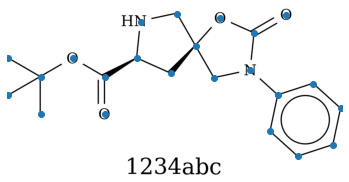

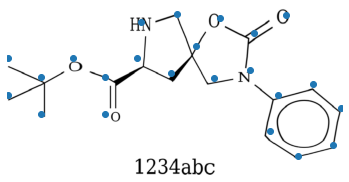

In [105]:
import albumentations as A
from bms.augment import ExpandSafeRotate, CropWhite, NormalizedGridDistortion

indigo = Indigo()
renderer = IndigoRenderer(indigo)

# mol = indigo.loadMolecule('ONc1cccc1')
mol = indigo.loadMolecule('CC(C)(C)OC(=O)[C@@H]1C[C@]2(CN1)CN(c1ccccc1)C(=O)O2')
indigo.setOption('render-background-color', '1,1,1')
indigo.setOption('render-output-format', 'png')
indigo.setOption('render-superatom-mode', 'collapse')
indigo.setOption('render-bond-length', '100')
indigo.setOption('render-font-family', 'Times')  #'Arial' 'Times' 'Courier' 'Helvetica'
indigo.setOption('render-relative-thickness', 1)
indigo.setOption('render-bond-line-width', 1)
indigo.setOption('render-label-mode', 'hetero') # "all", "terminal-hetero", "hetero"
indigo.setOption('render-implicit-hydrogens-visible', True)
indigo.setOption('render-stereo-style', 'none')
indigo.setOption('render-comment', '1234abc')
indigo.setOption('render-comment-font-size', 60)
img = renderer.renderToBuffer(mol)
img_array = np.asarray(bytearray(img), dtype=np.uint8)
img = cv2.imdecode(img_array, 1)
# img = np.repeat(np.expand_dims(img, 2), 3, axis=2)
plt.imshow(img)
# plt.xlim(0, 900)
# plt.ylim(400)
# plt.scatter(data[:,2],data[:,3])

print(img.shape)
mol.layout()
nodes = []
for atom in mol.iterateAtoms():
#     print(atom.xyz(), atom.coords())
    nodes.append(atom.coords())
nodes = np.array(nodes)

plt.scatter(nodes[:,0], nodes[:,1])
plt.axis('off')
plt.show()

transform = A.Compose([
#     A.Downscale(scale_min=0.2, scale_max=0.4, interpolation=1),
#     A.Blur(p=1),
    NormalizedGridDistortion(num_steps=10, distort_limit=0.3, p=1),
#     A.GaussNoise()
])

aug_img = transform(image=img)['image']
plt.imshow(aug_img)
plt.scatter(nodes[:,0], nodes[:,1])
plt.axis('off')
plt.show()

CCN(C1=NC(=CS1)CC(=O)NC2=CC=C(C=C2)Cl)C(=O)CCC(=O)[O-]
(451, 1332, 3)
C([Me])N(C(C([Rc])CC([O-])=O)=O)c1[s]cc(CC(Nc2ccc(Cl)cc2)=O)[n]1
CCN(C(CCC([O-])=O)=O)c1[s]cc(CC(Nc2ccc(Cl)cc2)=O)[n]1


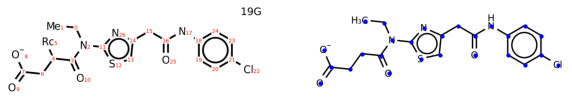

C1=CC=C(C=C1)C[C@H](C(=O)O)OC2=C(C=C(C=C2Cl)C3=CC4=C(C=C3)NC=C4)Cl
(381, 962, 3)
[CO2H]C(Oc1c(Cl)cc(-c2cc([Ar])c3[nH]ccc3c2)cc1Cl)C[Ph]
C([Ph])[C@@H](Oc1c(Cl)cc(-c2ccc3[nH]ccc3c2)cc1Cl)C(O)=O


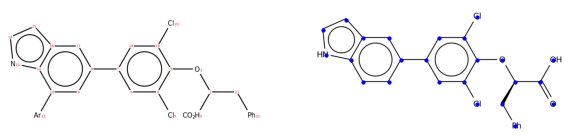

C1=CC=C(C=C1)/C=C/[C@H]2NC3=CC=CC=C3C(=O)N2CC4=CC=CO4
(570, 645, 3)
C([Ph])=C[C@@]1([R6])N(Cc2occc2)C(=O)c2c(cccc2)N1
C1C=CC(/C=C/[C@@H]2N(CC3OC=CC=3)C(=O)C3C(=CC=CC=3)N2)=CC=1


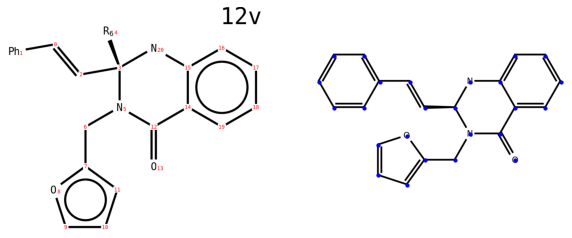

CC(=O)C1=CC=C(C=C1)O[C@@H]2[C@H]([C@@H]([C@H]([C@@H](O2)CO)O)O)O
(476, 793, 3)
C1([Ac])C=CC(O[C@H]2O[C@@H](CO)[C@H](O)[C@@H](O)[C@@]2([R11])O)=CC=1
CC(c1ccc(O[C@H]2O[C@@H](CO)[C@H](O)[C@@H](O)[C@@H]2O)cc1)=O


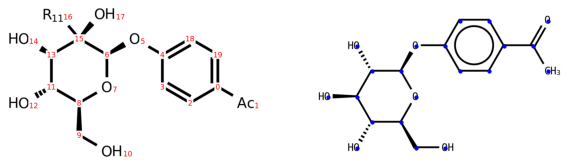

CC1=[N+](NOC1=O)CCCS(=O)C2=CC=CC=C2
(350, 751, 3)
C1([Me])C(=O)ON[N+]=1C([H])([H])CC[SH2]([Ph])=O
CC1C(=O)ON[N+]=1CCCS(C1C=CC=CC=1)=O


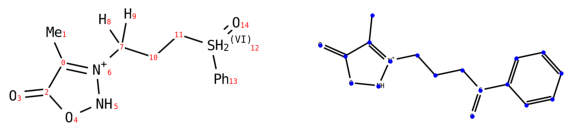

B(C1=CC=CC=C1)(C2=CC=CC=C2)OC[C@H](CC3=CC=CC=C3)N
(333, 501, 3)
B([Ph])([Ph])OCC([Bn])N
B([Ph])([Ph])OC[C@@H](N)C([Ph])[R6]


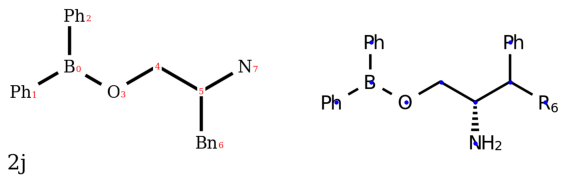

COC(=O)[C@@H]1CS[C@@H]2N1C(=O)[C@H]([C@H]([C@@H]2O)O)O
(457, 714, 3)
C([OCH3])([C@H]1N2C([C@@H](O)[C@@H](O)[C@H](O)[C@@]2([R1])SC1)=O)=O
COC([C@H]1N2C([C@@H](O)[C@@H](O)[C@H](O)[C@@H]2SC1)=O)=O


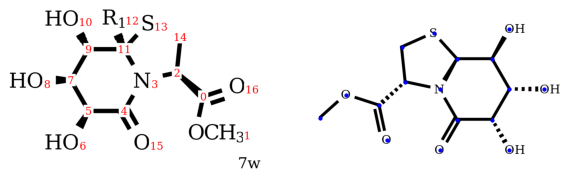

C1=CC=C(C=C1)OC2=CC=CC(=C2)C=NNC(=O)C(=O)NC3=CC=CC=C3C(=O)NC4=CC=C(C=C4)Cl
(799, 1128, 3)
O([Ph])C1C=C(C=NNC(C(NC2C(C(NC3C=CC(Cl)=CC=3)=O)=CC=CC=2)=O)=O)C=CC=1
O([Ph])c1cc(C=NN([E])C(C(Nc2c(C(Nc3cc([H])c(Cl)cc3)=O)cccc2)=O)=O)ccc1


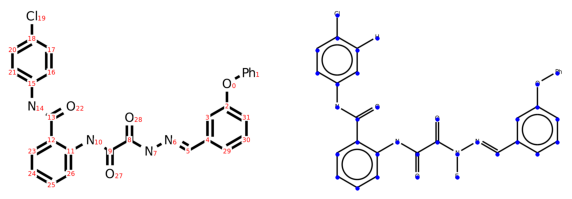

C1=CC=C(C=C1)CNC[C@H](C2=CC(=CC=C2)O)O
(323, 677, 3)
N([Bn])C[C@@H](O)C1C=CC=C(O)C=1
c1ccc(CNC[C@@H](O)c2cccc(O)c2)c([D])c1


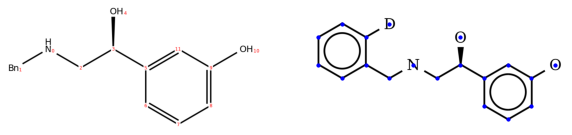

CC(=O)NCCC1=NC(=CS1)C2=NC(=CS2)C(=O)NCCCN
(348, 1406, 3)
C([Me])(NCCC1SC=C(C2SC=C(C(NCCCN)=O)N=2)N=1)=O
N([Ac])([R2])CCc1[s]cc(-c2[s]cc(C(NCCCN)=O)[n]2)[n]1


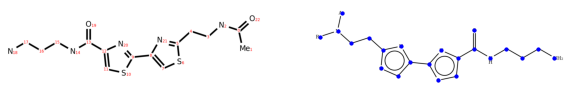

CC(C)(C)C1=CC=C(C=C1)C2=CC3=C(C=CC(=C3)Cl)C4=NCCN24.Cl
(557, 1190, 3)
[Me]C([Me])([Me])C1C=CC(C2N3C(=NCC3)C3C=CC(Cl)=CC=3C=2)=CC=1[R3].Cl
CC(c1ccc(C2N3C(=NCC3)c3ccc(Cl)cc3C=2)cc1)(C)C.Cl


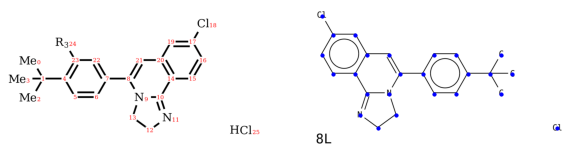

C1CC(=O)N(C1)CCCNC(=O)CN2C(=O)[C@@]3(CCOC4=CC=CC=C43)NC2=O
(534, 1185, 3)
C1CN(CCCNC(CN2C(=O)N[C@@]3(c4c(cccc4)OCC3)C2=O)=O)C(=O)C1
C1CN(CCCNC(CN2C(=O)N[C@@]3(C4C(=CC=CC=4)OCC3[Ra])C2=O)=O)C(=O)C1


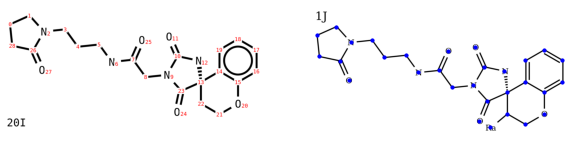

CC(C)[C@@H](C1=CC=C(C=C1)Cl)C(=O)OCC(=O)C2=C(N(C(=O)NC2=O)C)N
(400, 1103, 3)
C([iPr])(C(OCC(C1C(=O)NC([NMe]C=1N)=O)=O)=O)C1C=CC(Cl)=CC=1
CC([C@H](C(OCC(C1C(=O)NC(=O)N(C)C=1N)=O)=O)c1ccc(Cl)cc1)C


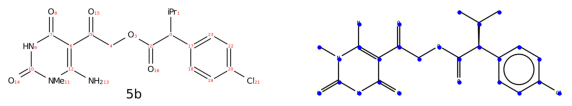

C[C@H](C(=O)NNC(=O)C1=CC=CC=C1)OC(=O)C(C)C
(325, 756, 3)
[Me]C([Me])C(=O)OC([Me])C(NN[Bz])=O
C[C@@H](OC(C(C)C)=O)C(NNC([Ph])=O)=O


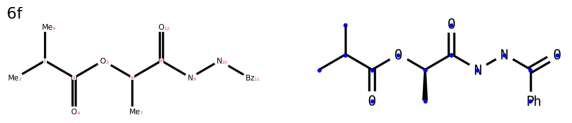

C1COC2=C(O1)C=CC(=C2)S(=O)(=O)N[C@H](CCC(=O)N)C(=O)[O-]
(407, 998, 3)
C1Oc2ccc(S(N[C@@H](C([O-])=O)C([Z])C[Cbm])(=O)=O)cc2OC1
C1Oc2ccc(S(N[C@@H](C([O-])=O)CCC(N)=O)(=O)=O)cc2OC1


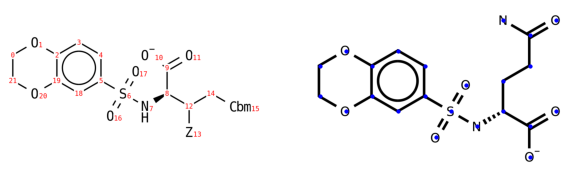

C[C@@H](C(=O)N[C@@H](CC1=CC=CC=C1)C(=O)N2CCC[C@H]2C(=O)N[C@@H](CC(C)C)C(=O)O)NC(=O)[C@H](CCCN=C(N)N)NC(=O)[C@H](CCC(=O)O)NC(=O)[C@H](CC(C)C)N
(872, 1677, 3)
[Bn]C(C(N1[C@H](C(NC([COOH])[iBu])=O)CCC1)=O)NC(=O)C([Me])NC([C@@H](NC([C@@H](NC(C([iBu])N)=O)CC[CO2H])=O)CCCN=C(N)N)=O
C[C@H](NC([C@@H](NC([C@@H](NC([C@@H](N)CC(C)C)=O)CCC(O)=O)=O)CC([H])([H])CN=C(N)N)=O)C(N[C@H](C(N1[C@H](C(NC([iBu])C(O)=O)=O)CCC1)=O)CC1C=CC=CC=1)=O


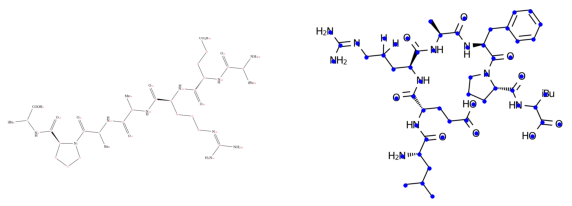

CC[C@H](C)NC1=C2C=NN(C2=NC=N1)C3=C(C=C(C=C3)C)C
(405, 1120, 3)
[Me]C(N([R6])c1[n]c[n]c2c1c[n][n]2-c1ccc([Me])cc1[Me])C[Me]
C([Et])(NC1N=CN=C2C=1C=NN2C1C=CC(C)=CC=1C)C


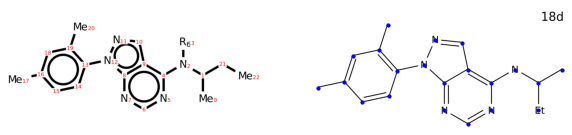

CCCCCCCC(=O)N1CCC(CC1)C2=NC(=NO2)C3=CC(=CC=C3)OC
(455, 1286, 3)
[OMe]C1=CC=CC(=C1)C1=NOC(=N1)C1CCN(CC1[Ar])C(=O)CCCC[Pr]
CCCCCCCC(N1CCC(C2ON=C(C3C=CC=C([OMe])C=3)N=2)CC1)=O


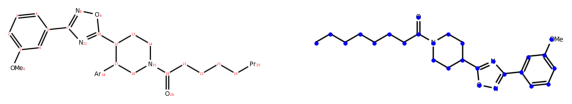

C1=CC=C(C=C1)COC(=O)N2[C@H](C(=O)O[C@@H]([C@@H]2C3=CC=CC=C3)C4=CC=CC=C4)CCCCCI
(535, 836, 3)
[Ph]C1N([C@@H](CCCCCI)C(OC1[Ph])=O)C(=O)OC[Ph]
C([OBn])(N1C([Ph])C([Ph])OC(=O)[C@@H]1CCCCCI)=O


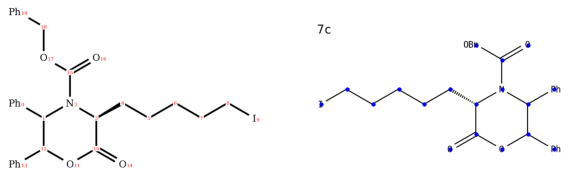

C1CC#C/C(=C\C2=CC=CC=C2)/C(C#CC(C1)OC(=O)C3=CC4=C(C=C3)C(=O)C5=CC=CC=C5C4=O)O
(536, 1295, 3)
C1CC(OC(C2C=CC3C(C4C(C(=O)C=3C=2)=CC=CC=4)=O)=O)C#CC(O)C(=C[Ph])C#CC1
C1CC(OC(C2C=CC3C(C4C(C(=O)C=3C=2)=CC=CC=4)=O)=O)C#CC(O)/C(=C/C2C=CC=CC=2)/C#CC1


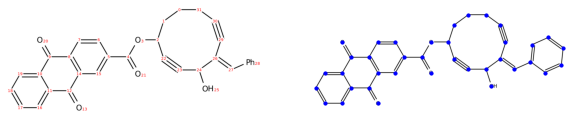

C[C@H](C(=O)N[C@@H](CC1=CC=C(C=C1)F)C(=O)O)N
(349, 913, 3)
[COOH]C(Cc1ccc(F)cc1)NC(=O)C([Me])N
C[C@@H](N)C(N[C@H](C(O)=O)CC1C=CC(F)=CC=1)=O


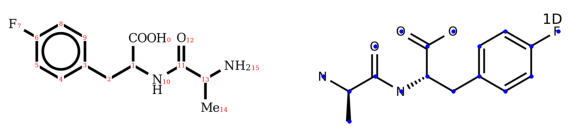

In [153]:
import random
import pandas as pd
from tqdm import tqdm
import sys
sys.path.append('/Mounts/rbg-storage1/users/yujieq/bms')
from bms.dataset import generate_indigo_image

df = pd.read_csv('../data/molbank/pubchem/train_200k.csv')

for idx, row in df.iterrows():
    smiles = row['SMILES']
    print(smiles)
    plt.figure(figsize=(10,5))
#     img, _, graph, success = generate_indigo_image(smiles, debug=True)
#     plt.subplot(1,2,1)
#     print(img.shape)
#     h, w, _ = img.shape
#     coords = np.array(graph['coords'])
#     plt.scatter(coords[:,1]*w, coords[:,0]*h)
#     plt.imshow(img)
    img, output_smiles, graph, success = generate_indigo_image(smiles, debug=True, mol_augment=True)
    print(img.shape)
    print(output_smiles)
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.axis('off')
    img, output_smiles, graph, success = generate_indigo_image(smiles, debug=False, mol_augment=True)
    print(output_smiles)
    plt.imshow(img)
    h, w, _ = img.shape
    coords = np.array(graph['coords'])
    x = coords[:,1]*w
    y = coords[:,0]*h
#     for i in range(len(x)):
#         for j in range(len(x)):
#             if graph['edges'][i][j] != 0 and i < j:
#                 if graph['edges'][i][j] in [5,6]:
#                     print(i, j, graph['edges'][i][j])
#                 plt.plot([x[i], x[j]], [y[i], y[j]], 'g', linewidth=6)
    plt.scatter(x, y, 10, color='b')
    plt.xlim(-20,w+10)
    plt.ylim(h+10,-20)
    plt.show()
    if idx >= 20:
        break

<class 'array.array'>
38192
(543, 862, 3)


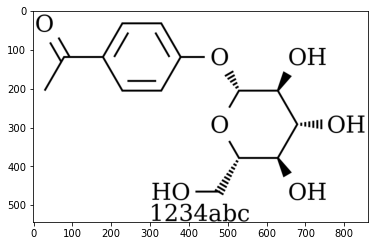

In [152]:
mol = indigo.loadMolecule("CC(=O)C1=CC=C(C=C1)O[C@@H]2[C@H]([C@@H]([C@H]([C@@H](O2)CO)O)O)O")
indigo.setOption('render-background-color', '1,1,1')
indigo.setOption('render-output-format', 'png')
indigo.setOption('render-relative-thickness', 1.5)
indigo.setOption('render-bond-line-width', 1)
# renderer.renderToFile(mol1, "mol.png")
img = renderer.renderToBuffer(mol)
print(type(img))
print(len(img))
img_array = np.asarray(bytearray(img), dtype=np.uint8)
img = cv2.imdecode(img_array, 0)
img = np.repeat(np.expand_dims(img, 2), 3, axis=2)
print(img.shape)
plt.imshow(img)
plt.show()

# import albumentations as A
# transform = A.Compose([
#     A.Downscale(scale_min=0.25, scale_max=0.5),
#     A.Blur(),
#     A.GaussNoise()
# ])

# aug_img = transform(image=img)['image']
# plt.imshow(aug_img)
# plt.axis('off')
# plt.show()

In [ ]:
import os
import pandas as pd

for split in ['train', 'valid', 'test']:
    df = pd.read_csv(f'data/molbank/chemdraw-data/{split}.csv')
    for i, row in df.iterrows():
        path = row['file_path'].replace('chemdraw-data', 'indigo-data')
        if 'abb-images' in path:
            continue
        dirname, filename = os.path.split(path)
        os.makedirs(dirname, exist_ok=True)
        try:
            mol = indigo.loadMolecule(row['SMILES'])
            renderer.renderToFile(mol, path)
        except:
            print(path, row['SMILES'])

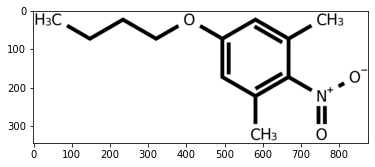

In [428]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import rdkit.Chem as Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from IPython.display import SVG


path = 'data/molbank/chemdraw-data/images/sty3-images/8001.png'
smiles = 'C1C2C3C2[C@]4(C1[C@@]3(C5C6C7C6C(=O)C5C74)O)O'

path = "data/molbank/chemdraw-data/images/std-images/2.png"
smiles = "CCCCOC1=CC(C)=C([N+](=O)[O-])C(C)=C1"

# img = cv2.imread(path)
# plt.imshow(img)
# plt.show()

# smiles = "COC(O)=NC1CCN(CCCC(=N)S)C1"

indigo.setOption('render-bond-length', '100')
indigo.setOption('render-relative-thickness', 1.)
indigo.setOption('render-bond-line-width', 3.)
indigo.setOption('render-label-mode', 'terminal-hetero') # "all", "terminal-hetero", "hetero"
indigo.setOption('render-implicit-hydrogens-visible', True)
indigo.setOption('render-stereo-style', 'none')
mol = indigo.loadMolecule(smiles)
renderer.renderToFile(mol, 'mol.png')

img = cv2.imread('mol.png')
plt.figure()
plt.imshow(img)
plt.show()

# mol = Chem.MolFromSmiles("COC(O)=NC1CCN(CCCC(=N)S)C1")
# img = Draw.MolsToGridImage([mol], subImgSize=(384,384), molsPerRow=1, useSVG=True)
# display(SVG(img.data))


In [51]:
import albumentations as A
from bms.augment import CropWhite

def get_transforms():
    trans_list = []
    trans_list.append(CropWhite(pad=3))
    trans_list.append(A.Resize(384, 384))
    trans_list += [
        A.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225],
        )
    ]
    return A.Compose(trans_list)

transform = get_transforms()

data/molbank/indigo-data/images/std-images/92730.png
(666, 1441, 3)


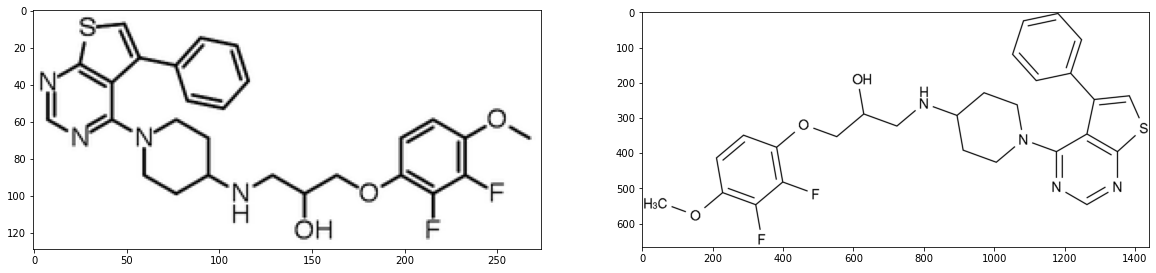

data/molbank/indigo-data/images/std-images/92731.png
(635, 1662, 3)


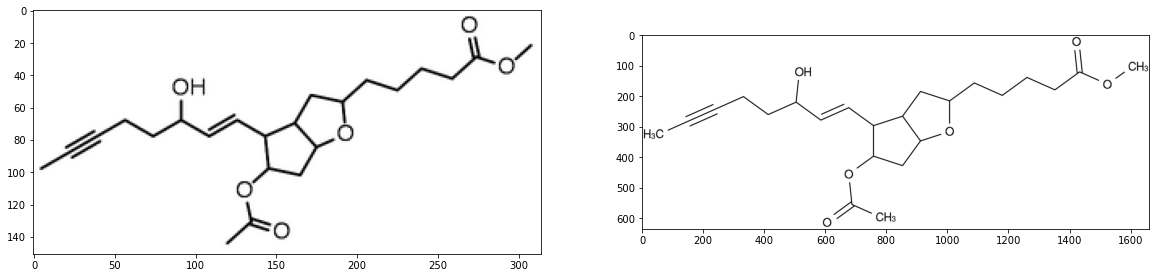

data/molbank/indigo-data/images/std-images/92732.png
(680, 1388, 3)


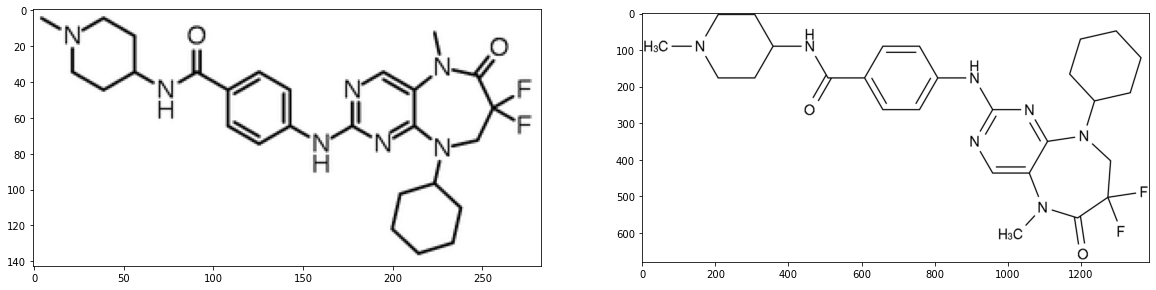

data/molbank/indigo-data/images/std-images/92733.png
(93, 515, 3)


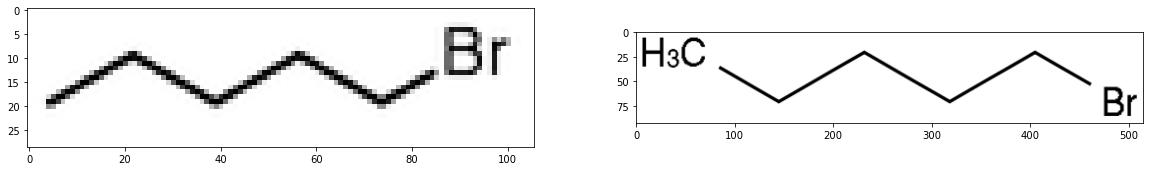

data/molbank/indigo-data/images/std-images/92734.png
(243, 599, 3)


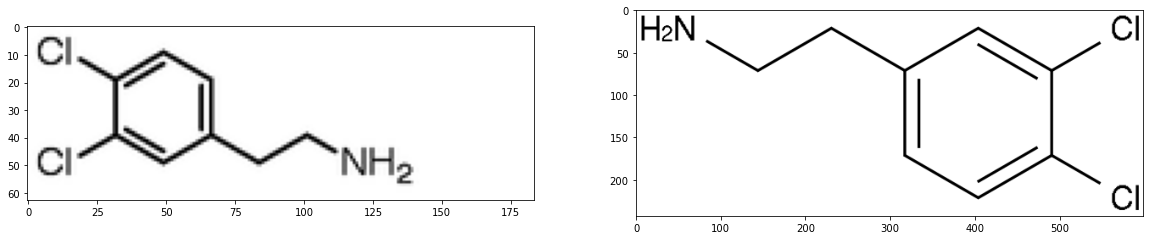

In [76]:
PATH = '/data/rsg/nlp/yujieq/bms/'
df = pd.read_csv('data/molbank/chemdraw-data/test.csv')

for i, row in df.iterrows():
    if i == 5:
        break
    plt.figure(figsize=(20,10))
    path = row['file_path']
    plt.subplot(1,2,1)
    img = cv2.imread(PATH + path)
#     img = transform(image=img)['image']
    plt.imshow(img)
    plt.subplot(1,2,2)
    path = path.replace('chemdraw', 'indigo')
    img = cv2.imread(PATH + path, cv2.IMREAD_UNCHANGED)
#     img = transform(image=img)['image']
    print(path)
    print(img.shape)
    plt.imshow(img)
    plt.show()